# Applying logistic regression and SVM:
In this chapter you will learn the basics of applying logistic regression and support vector machines (SVMs) to classification problems. You'll use the scikit-learn library to fit classification models to real data.

# 1. scikit-learn refresher
## 1.1 KNN classification
In this exercise you'll explore a subset of the [Large Movie Review Dataset](http://ai.stanford.edu/~amaas/data/sentiment/). The variables `X_train`, `X_test`, `y_train`, and `y_test` are already loaded into the environment. The `X` variables contain features based on the words in the movie reviews, and the `y` variables contain labels for whether the review sentiment is positive (+1) or negative (-1).

### Instructions:
* Create a KNN model with default hyperparameters.
* Fit the model.
* Print out the prediction for the test example 0.

In [1]:
from sklearn.datasets import load_svmlight_file
DATADIR='_datasets/'
X_train, y_train = load_svmlight_file(DATADIR+'reviews_train_smaller_pm1.txt')
X_test,  y_test  = load_svmlight_file(DATADIR+'reviews_test_smaller_pm1.txt')

# remove some examples, otherwise KNN is too slow
n = 2000
X_train = X_train[:n]
y_train = y_train[:n]
X_test = X_test[:n]
y_test = y_test[:n]

In [2]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test)[0]
print("Prediction for test example 0:", pred)

Prediction for test example 0: 1.0


## 1.2 Comparing models
Compare k nearest neighbors classifiers with k=1 and k=5 on the handwritten digits data set, which is already loaded into the variables `X_train`, `y_train`, `X_test`, and `y_test`. You can set k with the `n_neighbors` parameter when creating the `KNeighborsClassifier` object, which is also already imported into the environment.

Which model has a higher test accuracy?

Possible Answers:
1. k=1
2. k=5

In [3]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
digits = sklearn.datasets.load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=1)

In [4]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
knn1.score(X_test, y_test)

0.9888888888888889

In [5]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
knn5.score(X_test, y_test)

0.9933333333333333

## 1.3 Overfitting
Which of the following situations looks like an example of overfitting?

Possible Answers
1. Training accuracy 50%, testing accuracy 50%.
2. Training accuracy 95%, testing accuracy 95%.
3. Training accuracy 95%, testing accuracy 50%.
4. Training accuracy 50%, testing accuracy 95%.

<div style="text-align: right"> Answer: 3 </div>

# 2. Applying logistic regression and SVM
## 2.1 Running LogisticRegression and SVC
In this exercise, you'll apply logistic regression and a support vector machine to classify images of handwritten digits.

### Instructions:
* Apply logistic regression and SVM (using `SVC()`) to the handwritten digits data set using the provided train/validation split.
* For each classifier, print out the training and validation accuracy.

In [6]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import datasets
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression(solver='liblinear', multi_class='auto') # solver and multi_class parameter set to silence warning
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.994060876020787
0.9711111111111111


In [7]:
# Apply SVM and print scores
svm = SVC(gamma='auto') # gamma parameter set to silence warning
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

1.0
0.54


Later in the course we'll look at the similarities and differences of logistic regression vs. SVMs.

## 2.2 Sentiment analysis for movie reviews
In this exercise you'll explore the probabilities outputted by logistic regression on a subset of the [Large Movie Review Dataset](http://ai.stanford.edu/~amaas/data/sentiment/).

The variables `X` and `y` are already loaded into the environment. `X` contains features based on the number of times words appear in the movie reviews, and `y` contains labels for whether the review sentiment is positive (+1) or negative (-1).

### Instructions:
* Train a logistic regression model on the movie review data.
* Predict the probabilities of negative vs. positive for the two given reviews.
* Feel free to write your own reviews and get probabilities for those too!

In [8]:
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_svmlight_file
DATADIR='_datasets/'
X, y = load_svmlight_file(DATADIR+'reviews_train_smaller_pm1.txt')
#X_test,  y_test  = load_svmlight_file(DATADIR+'reviews_test_smaller_pm1.txt')

# Data is too big
X = X[:2000,]
y = y[:2000,]

with open('_datasets/reviews_vocab.txt') as f:
    vocab = f.read().splitlines()

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=vocab)

def get_features(review):
    return vectorizer.transform([review])

In [9]:
# Instantiate logistic regression and train
lr = LogisticRegression(solver='liblinear') # solver parameter set to silence warning
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

Review: LOVED IT! This movie was amazing. Top 10 this year.
Probability of positive review: 0.8079272805911303
Review: Total junk! I'll never watch a film by that director again, no matter how good the reviews.
Probability of positive review: 0.5855352242119005


The second probability would have been even lower, but the word "good" trips it up a bit, since that's considered a "positive" word.

# 3. Linear classifiers
## 3.1 Which decision boundary is linear?
Which of the following is a linear decision boundary?

<img src="_datasets/multiple_choce_linear_boundary.png" alt="">

<div style="text-align: right"> Answer: 1</div>

In [10]:
"""
Adapted from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
"""

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_4_classifiers(X, y, clfs):
    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    titles = ('LogisticRegression', 'LinearSVC', 'SVC', 'KNeighborsClassifier')
    
    for clf, title, ax in zip(classifiers, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
#         ax.set_xlabel(' ')
#         ax.set_ylabel(' ')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()

In [11]:
import warnings
warnings.filterwarnings("ignore")

## 3.2 Visualizing decision boundaries
In this exercise, you'll visualize the decision boundaries of various classifier types.

A subset of `scikit-learn`'s built-in `wine` dataset is already loaded into `X`, along with binary labels in `y`.

### Instructions:
* Create the following classifier objects with default hyperparameters: `LogisticRegression`, `LinearSVC`, `SVC`, `KNeighborsClassifier`.
* Fit each of the classifiers on the provided data using a `for` loop.
* Call the `plot_4_classifers()` function (similar to the code [here](https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html)), passing in `X`, `y`, and a list containing the four classifiers.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_wine()
X = data.data[:, :2] # Take the first two features, for visualization purposes
y = data.target
y = y > 0 # turn into binary classification

from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(X, y, train_size=50, random_state=0)

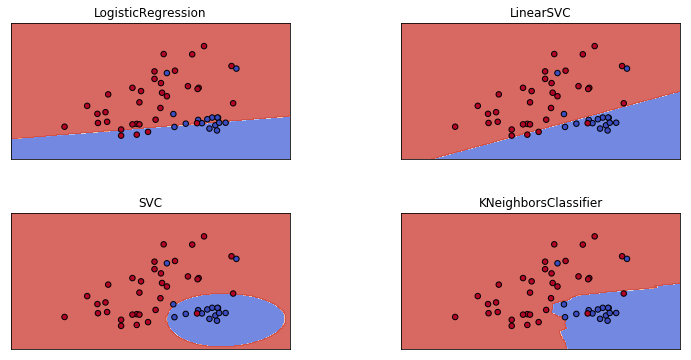

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

plt.rcParams['figure.figsize'] = [12, 6]

# Define the classifiers
classifiers = [LogisticRegression(solver='liblinear'), # solver parameter set to silence warning 
               LinearSVC(), 
               SVC(gamma='auto'), # gamma parameter set to silence warning 
               KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)

As you can see, logistic regression and linear SVM are linear classifiers whereas the default SVM and KNN are not.